<a href="https://www.kaggle.com/code/erhanalasar/nobel-prize-winners-python-block-project?scriptVersionId=179728865" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


**Python Block Project**<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>

<p>The Nobel Prize is perhaps the world's most recognized scientific award. It is awarded annually to scientists and academics in the fields of chemistry, literature, physics, medicine, economics and peace. In this project, we will examine the Nobel Prize winners.. </p>

## Project Questions

1. List the top ten countries with the most Nobel Prize winners.
2. List the first women to win Nobel Prizes.
3. List the first men to win Nobel Prizes.
4. Visualize from which year the country with the most Nobel Prize winners has dominated and what are the factors that have played a role in this dominance? Can you share your insights?
5. Visualize the gender, age, award category and year of the Nobel Prize winners. (Show a separate graph for each award category) Interpret the visual according to the results.
6. Visualize and interpret the categories and countries of the Nobel Prize winners between 1938-1945.
7. Visualize and interpret the categories and countries of the Nobel Prize winners between 1947-1991. (A separate graph is required for each category)
8. Visualize the countries and ages of people after 2000 in the categories of Chemistry, Literature, Peace, Physics and Medicine. (Separate visualizations are required for each category) Interpret the data.


In [1]:
# Turn off FutureWarning and CopyWarning warnings to avoid seeing them.
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator #to avoid seeing float values in the chart

### Let's import our dataset and make a copy of it. We will continue our work on the copy.

In [3]:
nobel = pd.read_csv('/kaggle/input/nobel-prize-winners/Nobel.csv')
df = nobel.copy()

#### First look at the dataset

In [4]:
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


### Let's observe how many missing values are in which column.

In [5]:
df.isnull().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

### Let's observe how many missing values are in which column.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

### Date data types look like object. Let's convert it to datetime type 

In [7]:
df['birth_date'] = pd.to_datetime(df['birth_date'], format='%Y-%m-%d')
df['death_date'] = pd.to_datetime(df['death_date'], format='%Y-%m-%d')

### There are missing values in the birthdays of some Nobel Prize winners and the date of establishment of some organizations, the city and country where they were founded, we will fill these missing values by searching on the internet.

#### Let's find Nobel Prize winners with missing date of birth information.

In [8]:
df.loc[(df['birth_date'].isnull()) & (df['laureate_type'] == 'Individual')]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
816,2009,Chemistry,The Nobel Prize in Chemistry 2009,"""for studies of the structure and function of ...",1/3,841,Individual,Venkatraman Ramakrishnan,NaT,"Chidambaram, Tamil Nadu",India,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,NaT,NaN,NaN
850,2011,Physics,The Nobel Prize in Physics 2011,"""for the discovery of the accelerating expansi...",1/2,864,Individual,Saul Perlmutter,NaT,"Champaign-Urbana, IL",United States of America,Male,Lawrence Berkeley National Laboratory,"Berkeley, CA",United States of America,NaT,NaN,NaN


#### Fill in the date of birth of these people, which is NaN.

In [9]:
individiual_missing_birth_dates = ['1952-04-01','1959-09-22']
df.loc[(df['birth_date'].isnull()) & (df['laureate_type'] == 'Individual'),'birth_date'] = individiual_missing_birth_dates

### Let's identify Nobel Winning Organizations with missing founding dates. Since there is no founding date variable for organizations, we will use the 'birth_date' variable to fill in these dates

In [10]:
df.loc[(df['birth_date'].isnull()) & (df['laureate_type'] == 'Organization')]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
60,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
200,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
237,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
238,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
349,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


#### Fill in the founding dates ('birth_dates') of these organizations, which are NaN.

In [11]:

organization_missing_birth_dates =  ["1873-09-08","1891-05-22","1863-02-17","1931-04-01","1917-12-10","1917-12-10",
                                     "1950-12-14","1919-07-15","1946-12-11","1919-04-11","1961-07-28","1980-12-10",
                                     "1948-05-29","1919-07-15","1957-07-07","1992-10-03","1971-12-20","1945-10-24",
                                     "1957-07-29","1983-10-02","1988-11-20","1993-11-01","1997-04-29","1948-05-29",
                                     "1957-07-07","1992-10-03"]

df.loc[(df['birth_date'].isnull()) & (df['laureate_type'] == 'Organization'),'birth_date'] = organization_missing_birth_dates

### Let's find organizations with missing organization_city value

In [12]:
df.loc[(df['organization_city'].isnull()) & (df['laureate_type'] == 'Organization')]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,1873-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
60,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,1891-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,1863-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
200,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,1931-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,1917-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
237,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),1917-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
238,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),1950-12-14,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,1919-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,1946-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
349,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,1919-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


### Let's fill these missing values with the following values

In [13]:
missing_organization_cities = ["Gent","Bern","Geneva","Geneva","Geneva","London","Philadelphia","Geneva","Geneva","Paris",
                               "New York City","Geneva","London","Geneva","Boston","Geneva","London","Geneva","Vienna",
                               "London","Vienna","Dhaka","Geneva","Brussels","Geneva","Brussels","Geneva","Brussels",
                               "The Hague","Tunis",]
df.loc[(df['organization_city'].isnull()) & (df['laureate_type'] == 'Organization'),'organization_city'] = missing_organization_cities

### Let's find organizations with missing organization_country value

In [14]:
df.loc[(df['organization_country'].isnull()) & (df['laureate_type'] == 'Organization')]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,1873-09-08,NaN,NaN,NaN,NaN,Gent,NaN,NaT,NaN,NaN
60,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,1891-05-22,NaN,NaN,NaN,NaN,Bern,NaN,NaT,NaN,NaN
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,1863-02-17,NaN,NaN,NaN,NaN,Geneva,NaN,NaT,NaN,NaN
200,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,1931-04-01,NaN,NaN,NaN,NaN,Geneva,NaN,NaT,NaN,NaN
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,1917-12-10,NaN,NaN,NaN,NaN,Geneva,NaN,NaT,NaN,NaN
237,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),1917-12-10,NaN,NaN,NaN,NaN,London,NaN,NaT,NaN,NaN
238,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),1950-12-14,NaN,NaN,NaN,NaN,Philadelphia,NaN,NaT,NaN,NaN
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,1919-07-15,NaN,NaN,NaN,NaN,Geneva,NaN,NaT,NaN,NaN
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,1946-12-11,NaN,NaN,NaN,NaN,Geneva,NaN,NaT,NaN,NaN
349,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,1919-04-11,NaN,NaN,NaN,NaN,Paris,NaN,NaT,NaN,NaN


### Let'sfill these missing values with the following values

In [15]:
missing_organization_countries =  ["Belgium","Switzerland","Switzerland","Switzerland","Switzerland","United Kingdom",
                                   "United States","Switzerland","Switzerland","France","United States","Switzerland",
                                   "United Kingdom","Switzerland","United States","Switzerland","United Kingdom",
                                   "Switzerland","Austria","United Kingdom","Austria","Bangladesh","Switzerland",
                                   "Belgium","Switzerland","Belgium","Switzerland","Belgium","Netherlands","Tunisia"]


df.loc[(df['organization_country'].isnull()) & (df['laureate_type'] == 'Organization'),'organization_country'] = missing_organization_countries

### Let's identify the rows with missing gender values.

In [16]:
df.loc[df['sex'].isnull()]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,1873-09-08,NaN,NaN,NaN,NaN,Gent,Belgium,NaT,NaN,NaN
60,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,1891-05-22,NaN,NaN,NaN,NaN,Bern,Switzerland,NaT,NaN,NaN
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,1863-02-17,NaN,NaN,NaN,NaN,Geneva,Switzerland,NaT,NaN,NaN
200,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,1931-04-01,NaN,NaN,NaN,NaN,Geneva,Switzerland,NaT,NaN,NaN
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,1917-12-10,NaN,NaN,NaN,NaN,Geneva,Switzerland,NaT,NaN,NaN
237,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),1917-12-10,NaN,NaN,NaN,NaN,London,United Kingdom,NaT,NaN,NaN
238,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),1950-12-14,NaN,NaN,NaN,NaN,Philadelphia,United States,NaT,NaN,NaN
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,1919-07-15,NaN,NaN,NaN,NaN,Geneva,Switzerland,NaT,NaN,NaN
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,1946-12-11,NaN,NaN,NaN,NaN,Geneva,Switzerland,NaT,NaN,NaN
349,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,1919-04-11,NaN,NaN,NaN,NaN,Paris,France,NaT,NaN,NaN


### As can be seen from the above result, all values with the gender variable NaN are an organization. Since organizations cannot have a gender, we will assign the value “Other” to these missing values

In [17]:
df.loc[df['sex'].isnull(),'sex'] = 'Other'

# There are countries with very long names in the dataset. In order to make the graphs more readable, we will replace the names of some countries with shorter versions.

In [18]:
country_short_names = {"United States of America":"USA", "United Kingdom":"UK","Austria-Hungary (Austria)":"Austria",
                       "Austria-Hungary (Croatia)":"Croatia","Austria-Hungary (Hungary)":"Hungary",
                       "Germany (Poland)":"Poland", "Russian Empire (Finland)":"Finland",
                       "British Mandate of Palestine (Israel)":"Israel","British Protectorate of Palestine (Israel)": "Israel",
                       "Korea (South Korea)": "Korea", "Gold Coast (Ghana)":"Ghana", "British India (Bangladesh)": "Bangladesh",
                       "Union of Soviet Socialist Republics (Belarus)":"Belarus", "West Germany (Germany)": "Germany", 
                       "Union of Soviet Socialist Republics (Russia)":"Russia","Czechoslovakia (Czech Republic)": "Czech Republic", 
                       "Austria-Hungary (Czech Republic)":"Czech Republic", "Austrian Empire (Austria)":"Austria",
                       "Java, Dutch East Indies (Indonesia)":"Indonesia","Prussia (Poland)":"Poland","Germany (Russia)":"Russia",
                       "Austrian Empire (Czech Republic)": "Czech Republic","Austria-Hungary (Slovenia)":"Slovenia",
                       "Mecklenburg (Germany)":"Germany","Austria-Hungary (Poland)":"Poland","Persia (Iran)":"Iran",
                       "Russian Empire (Poland)":"Poland","Prussia (Germany)":"Germany"}
df["birth_country"] = df["birth_country"].replace(country_short_names)
df["organization_country"] = df["organization_country"].replace(country_short_names)

# Question 1
#### Find the top ten winners of Nobel Prizes.

In [19]:
# Let's calculate the number of awards for each country by grouping by country.
country_awards = df.groupby('birth_country').size()

# Sort by total number of awards.
country_awards_sorted = country_awards.sort_values(ascending=False)

# Let's identify the top 10 most awarded countries.
most_awarded_countries = pd.DataFrame(country_awards_sorted[0:10])

In [20]:
# Let's edit the index and column names.
most_awarded_countries = most_awarded_countries.reset_index()
most_awarded_countries.columns = ['Most Awarded Countries', 'Award Count']

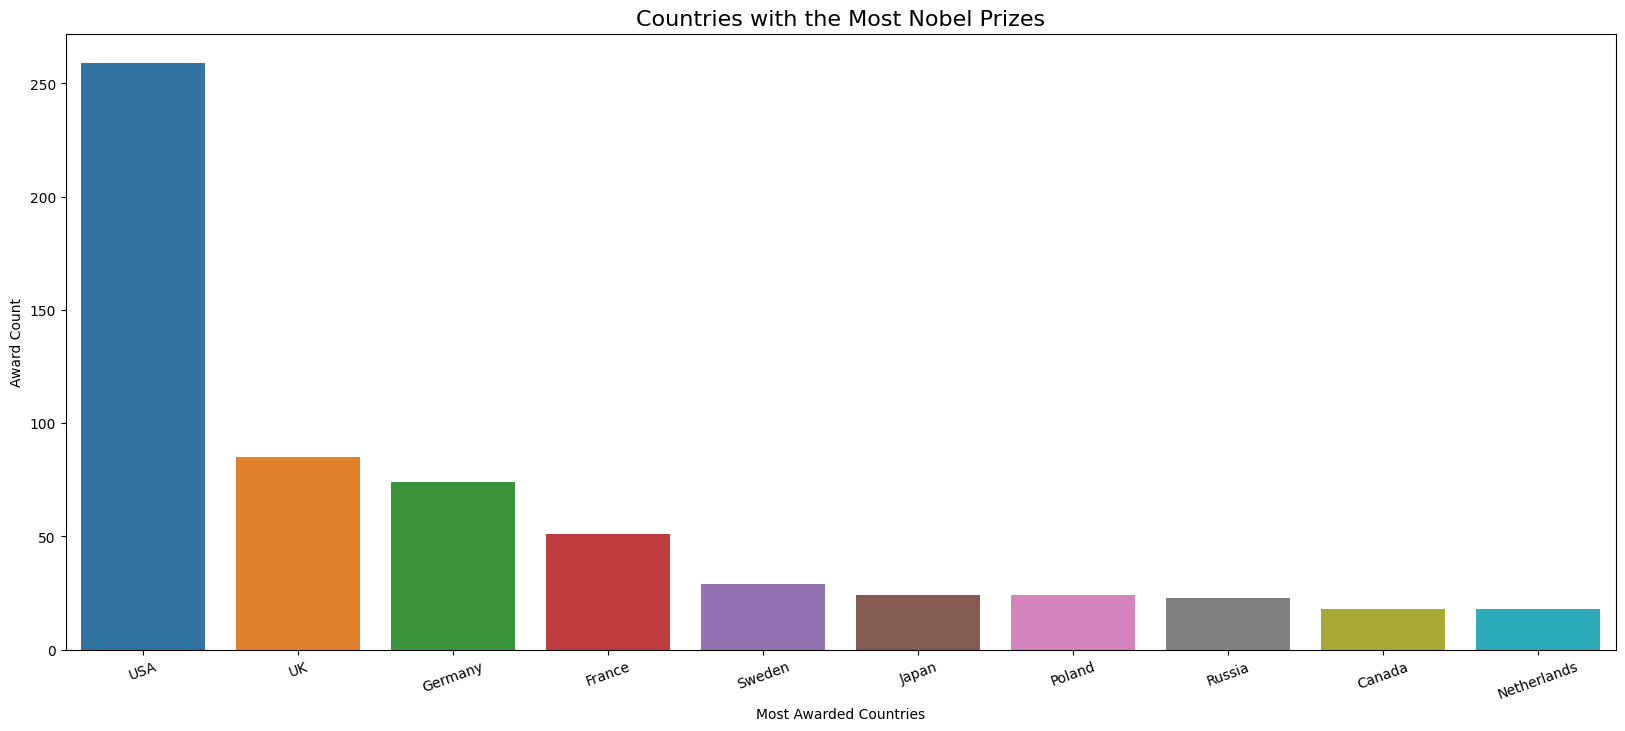

In [21]:
# Let's create the graph.
plt.figure(figsize=(20,8))                                                                 
sns.barplot(data = most_awarded_countries,x = 'Most Awarded Countries', y = 'Award Count')   
plt.xticks(rotation=20)
plt.title("Countries with the Most Nobel Prizes",fontsize=16)
plt.show()

# Question 2
### List the first women to win Nobel Prizes.

### Let's identify the first women to win Nobel prizes.

In [22]:
first_women_winners  = df[df['sex'] == 'Female'].sort_values('year')[0:10]

### Let's bring the first women to win the Nobel Prize with year and category information.

In [23]:
first_women_winners = first_women_winners[['year','full_name','category','birth_country']].reset_index(drop=True)
first_women_winners

,year,full_name,category,birth_country
0,1903,"Marie Curie, née Sklodowska",Physics,Poland
1,1905,"Baroness Bertha Sophie Felicita von Suttner, n...",Peace,Czech Republic
2,1909,Selma Ottilia Lovisa Lagerlöf,Literature,Sweden
3,1911,"Marie Curie, née Sklodowska",Chemistry,Poland
4,1926,Grazia Deledda,Literature,Italy
5,1928,Sigrid Undset,Literature,Denmark
6,1931,Jane Addams,Peace,USA
7,1935,Irène Joliot-Curie,Chemistry,France
8,1938,Pearl Buck,Literature,USA
9,1945,Gabriela Mistral,Literature,Chile


# Question 3
### List the first men to win Nobel Prizes.

### Let's identify the first men to win Nobel prizes.

In [24]:
first_men_winners  = df[df['sex'] == 'Male'].sort_values('year')[0:10]

### Let's bring the first men to win the Nobel Prize with year, category and country.

In [25]:
first_men_winners = first_men_winners[['year','full_name','category','birth_country']].reset_index(drop=True)
first_men_winners 

,year,full_name,category,birth_country
0,1901,Jacobus Henricus van 't Hoff,Chemistry,Netherlands
1,1901,Sully Prudhomme,Literature,France
2,1901,Emil Adolf von Behring,Medicine,Poland
3,1901,Jean Henry Dunant,Peace,Switzerland
4,1901,Frédéric Passy,Peace,France
5,1901,Wilhelm Conrad Röntgen,Physics,Germany
6,1902,Hendrik Antoon Lorentz,Physics,Netherlands
7,1902,Charles Albert Gobat,Peace,Switzerland
8,1902,Élie Ducommun,Peace,Switzerland
9,1902,Pieter Zeeman,Physics,Netherlands


# Question 4
### Can you visualize the year from which the country with the most Nobel prize winners has dominated and what are the things that have played a role in this dominance? 

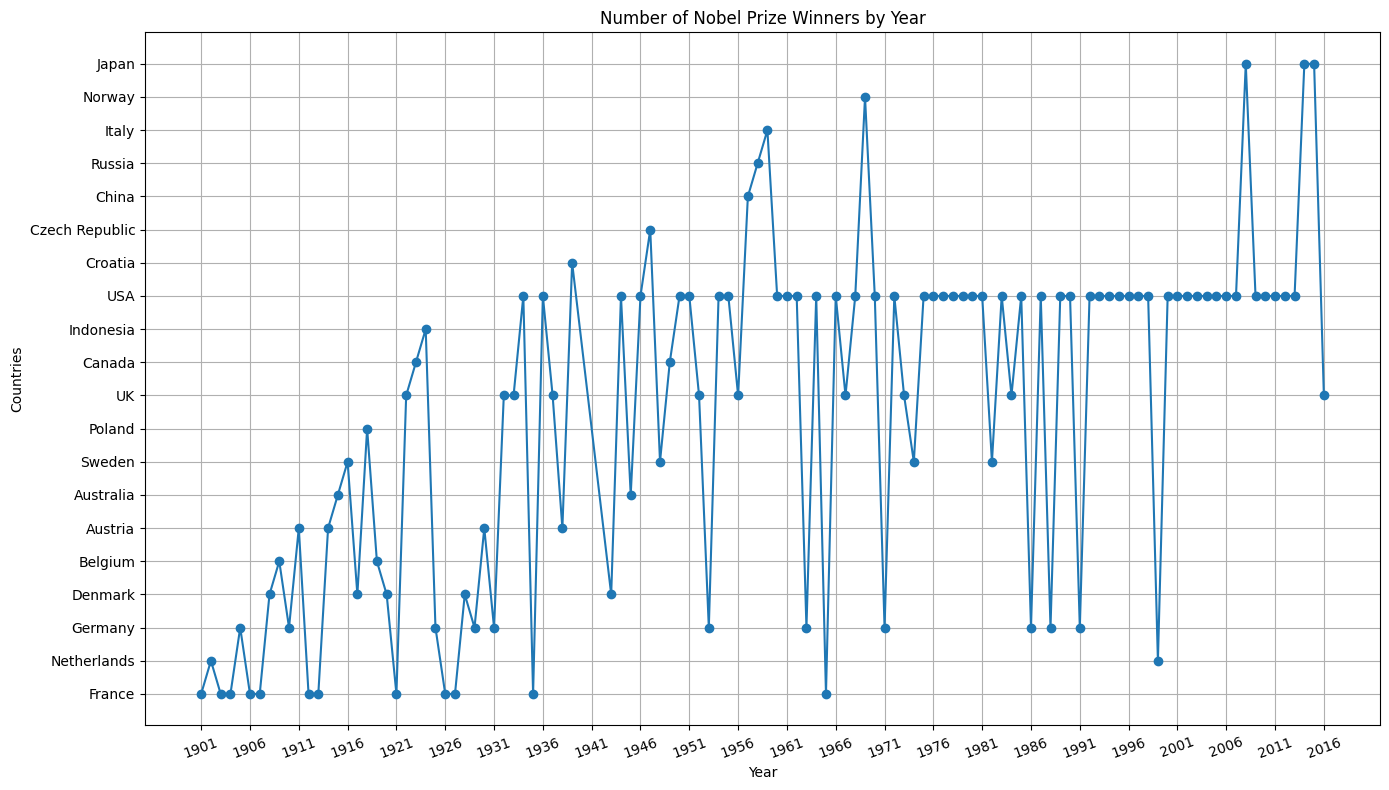

In [26]:
# Let's select the 'year' and 'birth_country' columns.
year_country = df[['year', 'birth_country']]

# Let's group the data by year and country and calculate how many Nobels each country won in each year.
year_country_count = year_country.groupby(['year', 'birth_country']).size().reset_index(name='count')

# Let's identify the country with the most prize winners for each year. year.
most_awarded_countries = year_country_count.loc[year_country_count.groupby('year')['count'].idxmax()]

# Let's create the graph.
plt.figure(figsize=(14, 8))
plt.plot(most_awarded_countries['year'], most_awarded_countries['birth_country'], marker='o', linestyle='-')
plt.title("Number of Nobel Prize Winners by Year")
plt.xlabel("Year")
plt.ylabel("Countries")
plt.xticks(range(min(most_awarded_countries['year']), max(most_awarded_countries['year'])+1, 5),rotation = 20)
plt.grid(True)
plt.tight_layout()
plt.show()


# Question 5
#### Visualize the gender, age, prize category and year of Nobel Prize winners. (Show a separate graph for each prize category) 

### Let's create a new dataframe with year, gender and category data.

In [27]:
df_new = df[['year','sex','category']]

### Let's calculate the age and assign it to the variable named age.

In [28]:
df_new['age'] = (df_new['year'] - df['birth_date'].dt.year)

### Let's categorize ages and years and assign them to age_group and year_group variables.

In [29]:
df_new['age_group'] = pd.cut(df_new['age'], bins=[0, 30, 40, 50, 60, 70, 80, 90, 100],
                          labels=['0-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

df_new['year_group'] = pd.cut(df_new['year'], bins = [1900, 1920, 1940, 1960, 1980, 2000, 2016],
                              labels=['1900-1920', '1921-1940', '1941-1960','1961-1980','1981-2000','2000-2016'])

### First, we will take a more general view and then we will drill down by category and year.

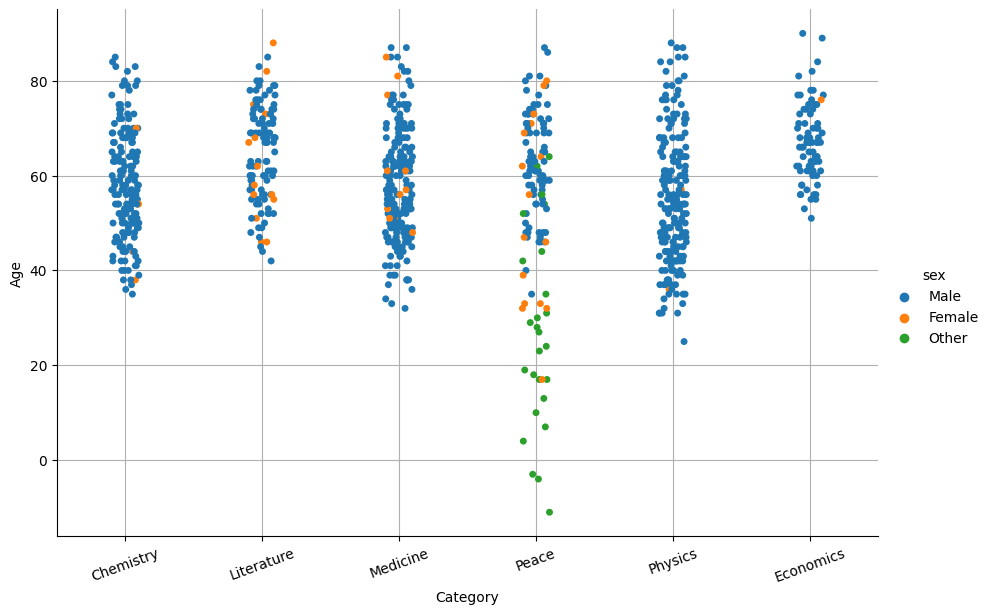

In [30]:
sns.catplot(data=df_new, x = "category", y = "age",hue="sex",height=6, aspect=1.5)
plt.xticks(rotation=20)
plt.xlabel('Category')
plt.ylabel('Age')
plt.grid(True)
plt.show()

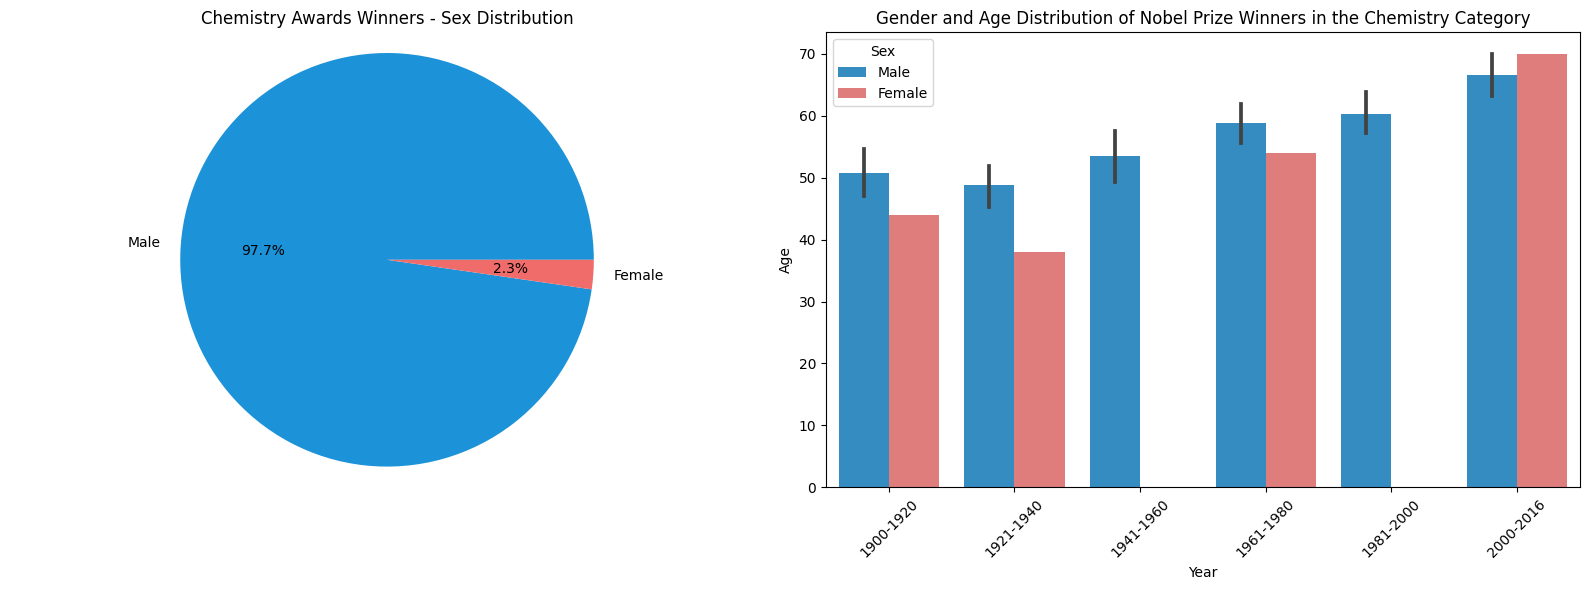

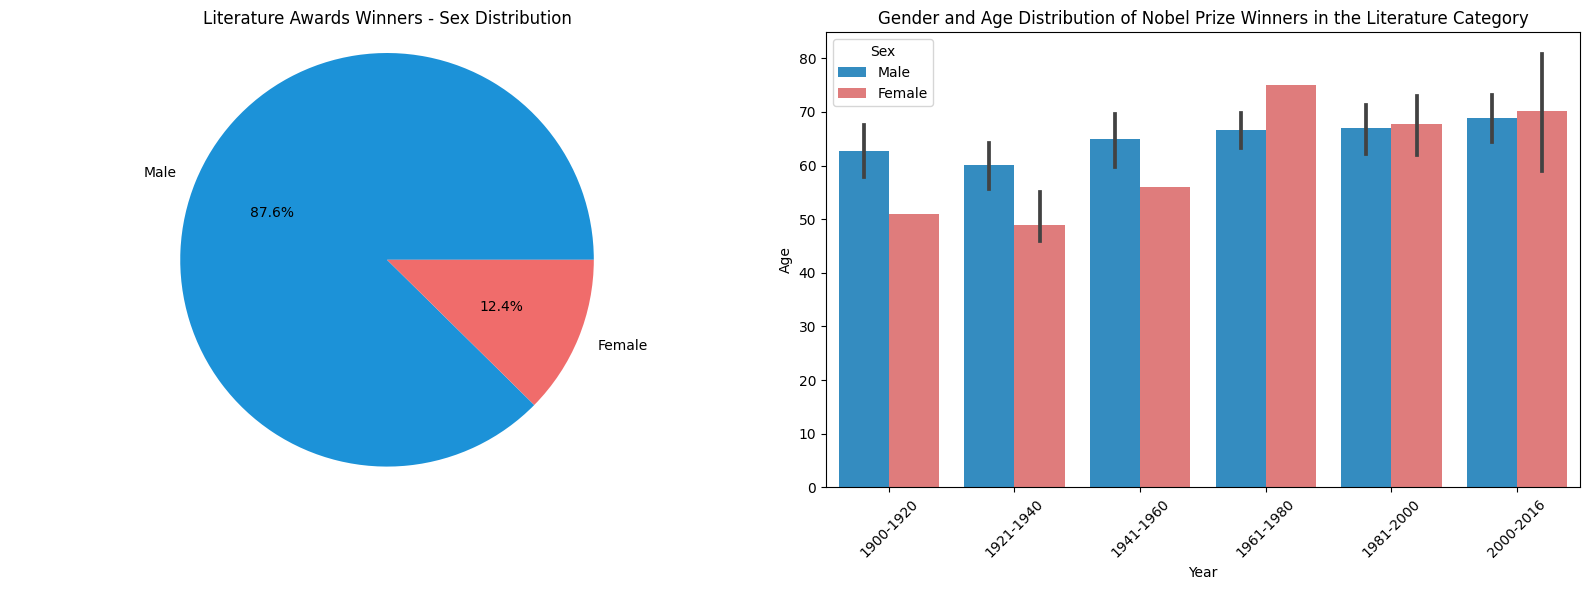

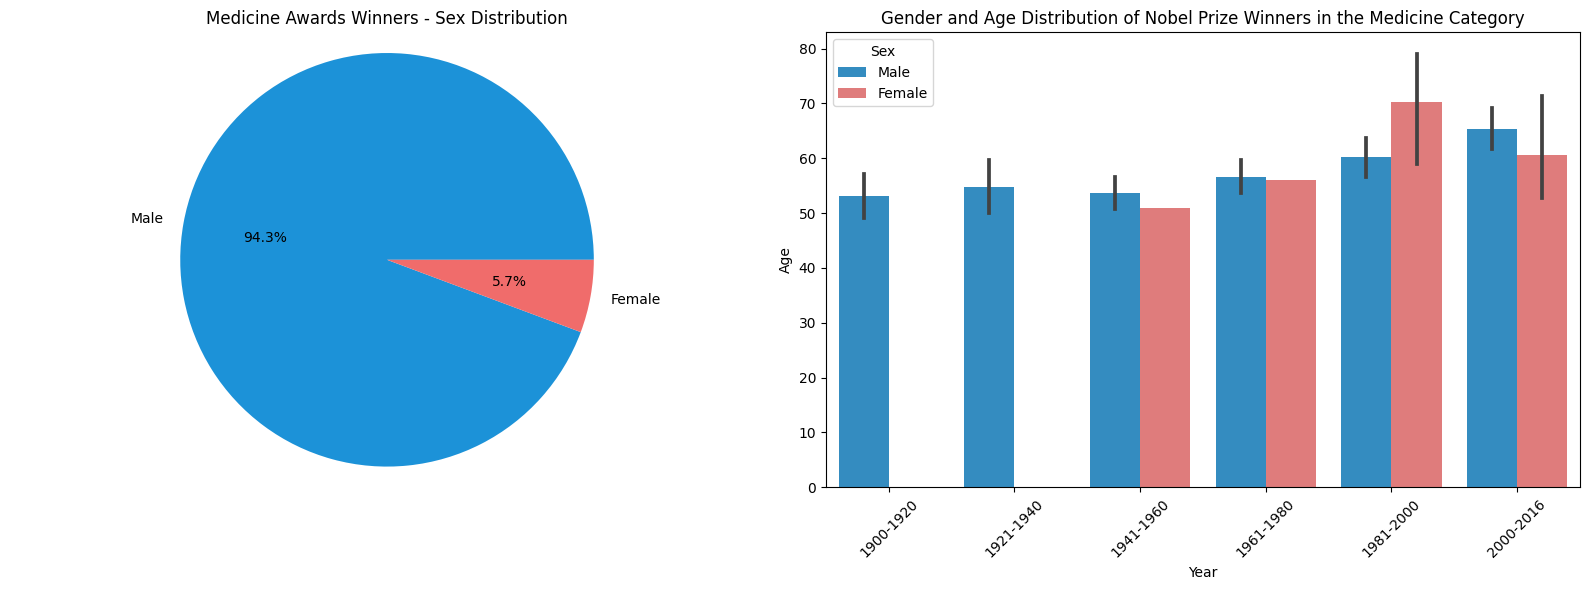

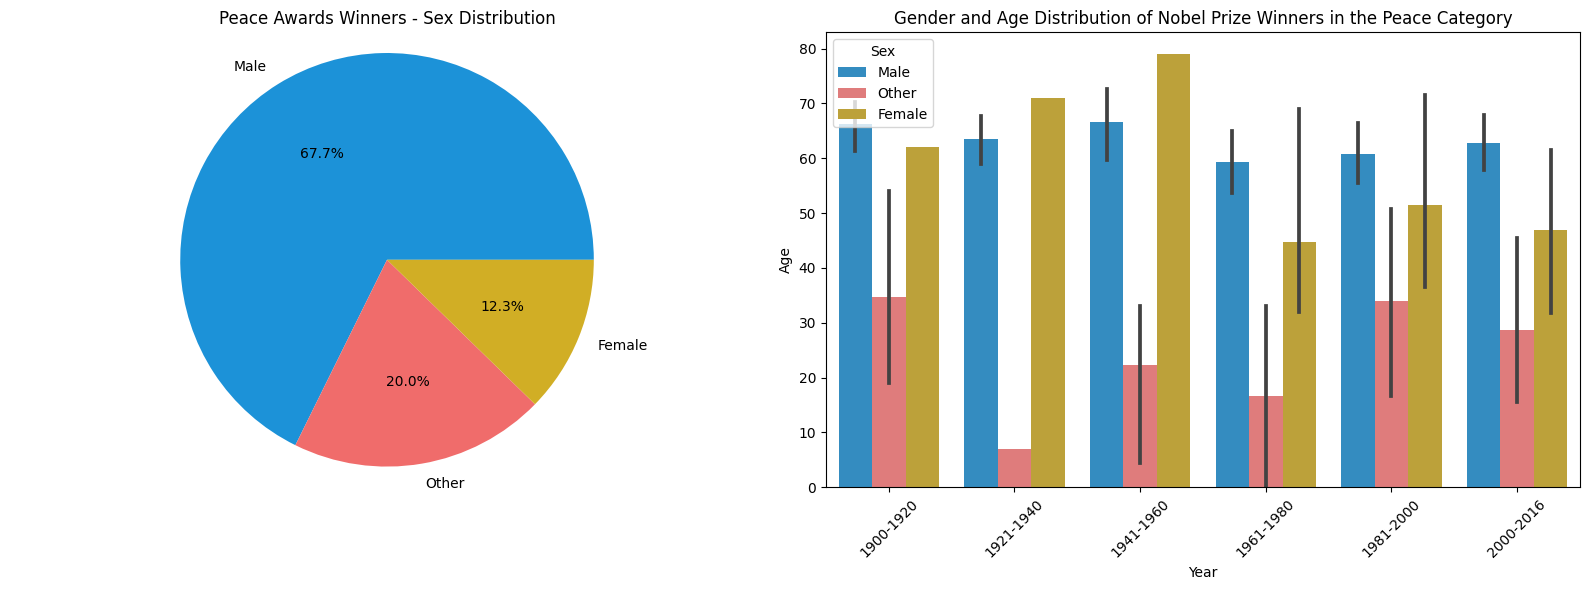

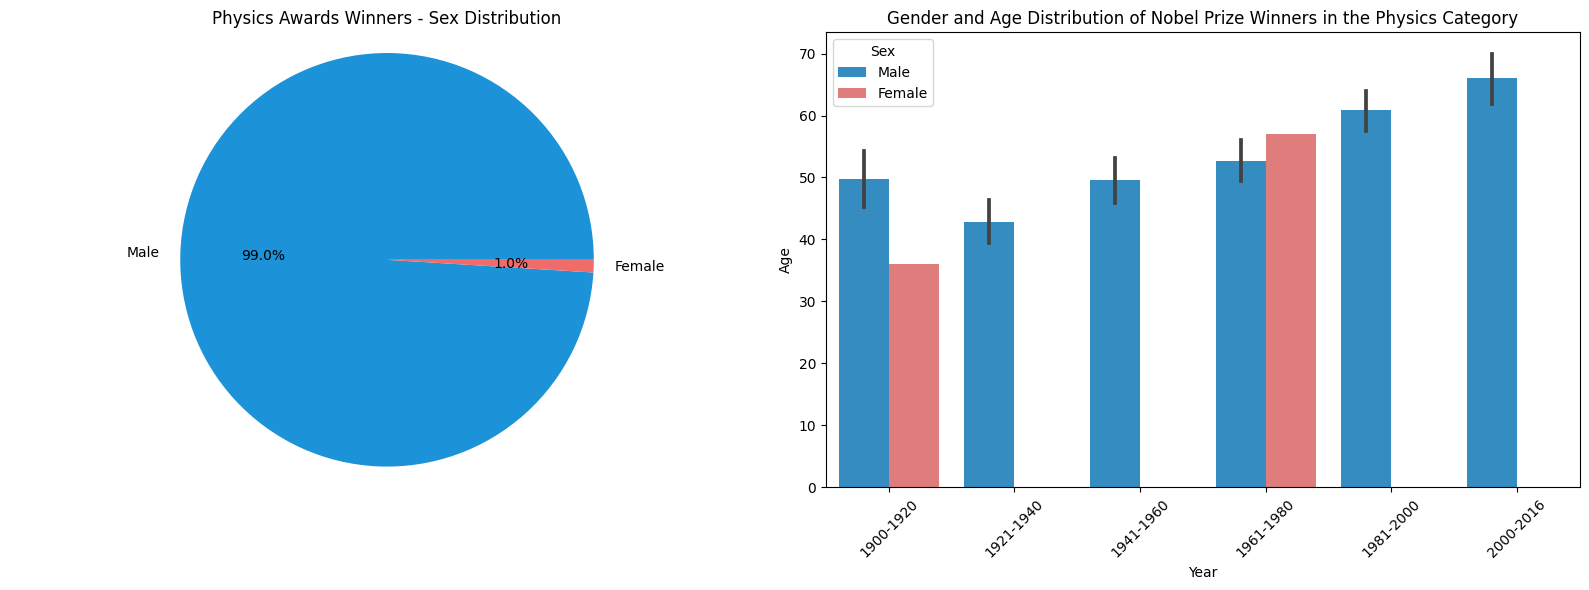

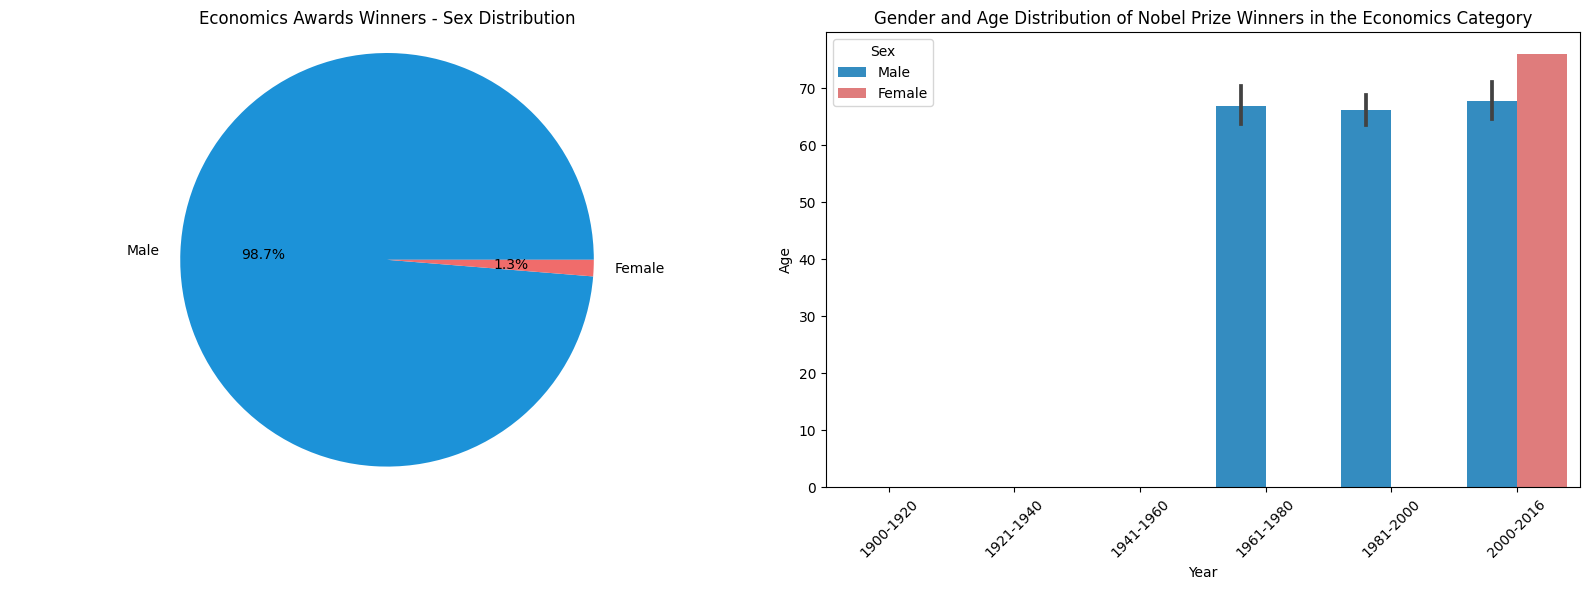

In [31]:
categories = df_new["category"].unique()

# Let's create the graphs for each category.
for category in categories:
    # Select category winners' data
    category_data = df_new[df_new["category"] == category]
    
    # Gender, age and year group distribution
    plt.figure(figsize=(16, 6))  # Adjust chart size
    plt.subplot(1, 2, 1)  # Allocate left space for two charts
    gender_counts = category_data["sex"].value_counts()
    total_winners = gender_counts.sum()
    gender_percentages = [count / total_winners * 100 for count in gender_counts]
    labels = gender_counts.index
    plt.pie(gender_percentages, labels=labels, autopct='%1.1f%%', startangle=0, colors=['#1C92D8', '#F06C6B', '#D1AE25'])
    plt.title(f"{category} Awards Winners - Sex Distribution")
    plt.axis('equal')
    
    plt.subplot(1, 2, 2)  # Reserve the space on the right for two charts
    sns.barplot(x='year_group', y='age', hue='sex', data=category_data, palette=['#1C92D8', '#F06C6B', '#D1AE25'])
    plt.title(f'Gender and Age Distribution of Nobel Prize Winners in the {category} Category')
    plt.xlabel('Year')
    plt.ylabel('Age')
    plt.legend(title='Sex', loc='upper left')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Question 6
#### Visualize the categories and countries of the Nobel Prize winners between 1938 and 1945.

In [32]:
df_range = df[df['year'].between(1938, 1945)]

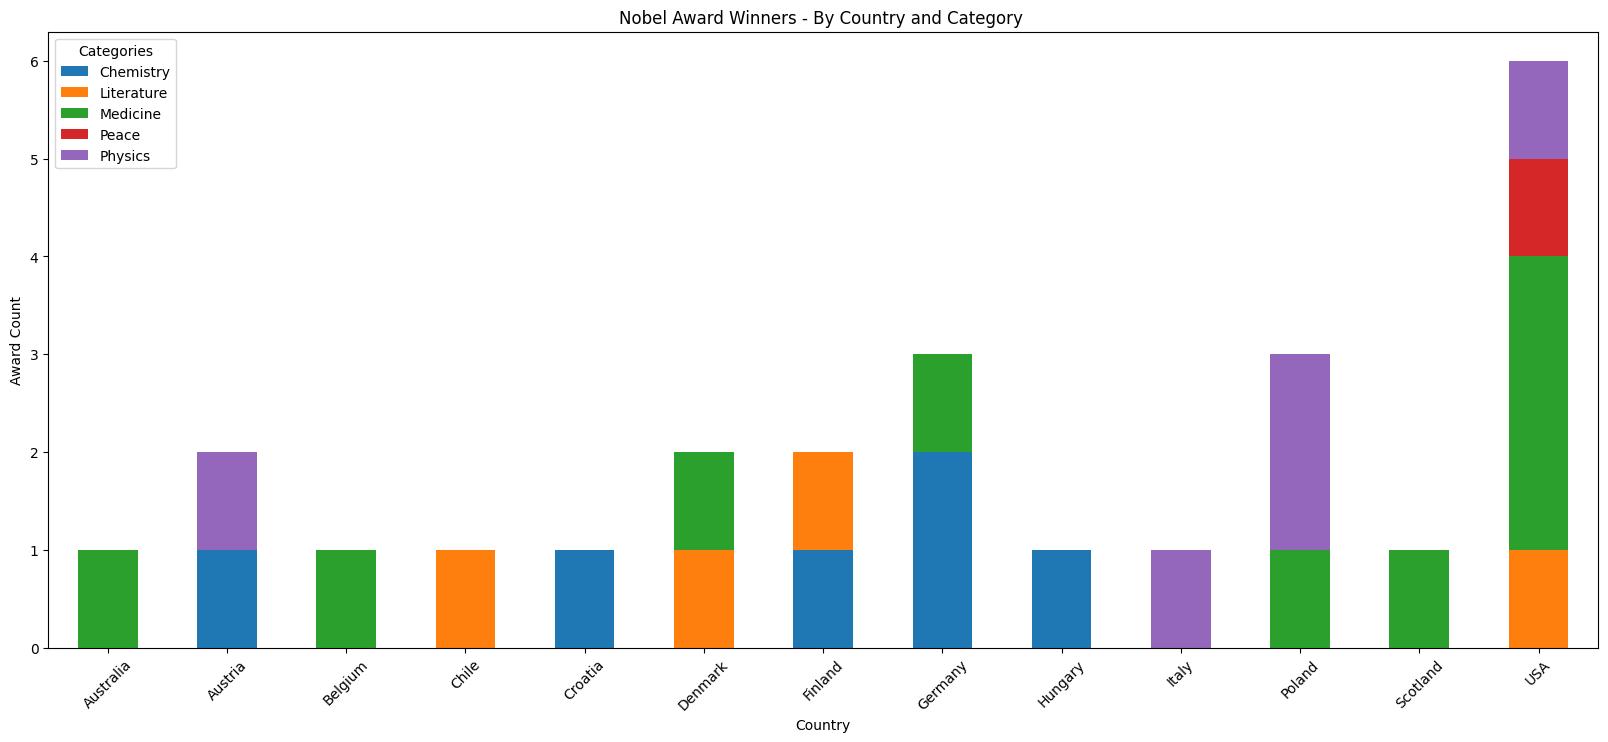

In [33]:
# Ülkelere ve kategorilere göre ödül sayısını hesaplayalım.
sum_df= df_range.groupby(['birth_country', 'category']).size().unstack(fill_value=0)

# Let's create the graph
sum_df.plot(kind='bar', stacked=True, figsize=(20, 8))
plt.title('Nobel Award Winners - By Country and Category ')
plt.xlabel('Country')
plt.ylabel('Award Count')
plt.xticks(rotation=45)
plt.legend(title='Categories', bbox_to_anchor=(0, 1),loc='upper left')
plt.show()


# Question 7
#### Visualize and interpret the categories and countries of the Nobel Prize winners between 1947-1991. (A separate graph is required for each category)

In [34]:
df_range = df[df['year'].between(1947, 1991)]
df_range = df_range[['year','category','birth_country']]
df_range = df_range.rename(columns = {'year':'Year','category':'Category','birth_country':'Winner_Country'})

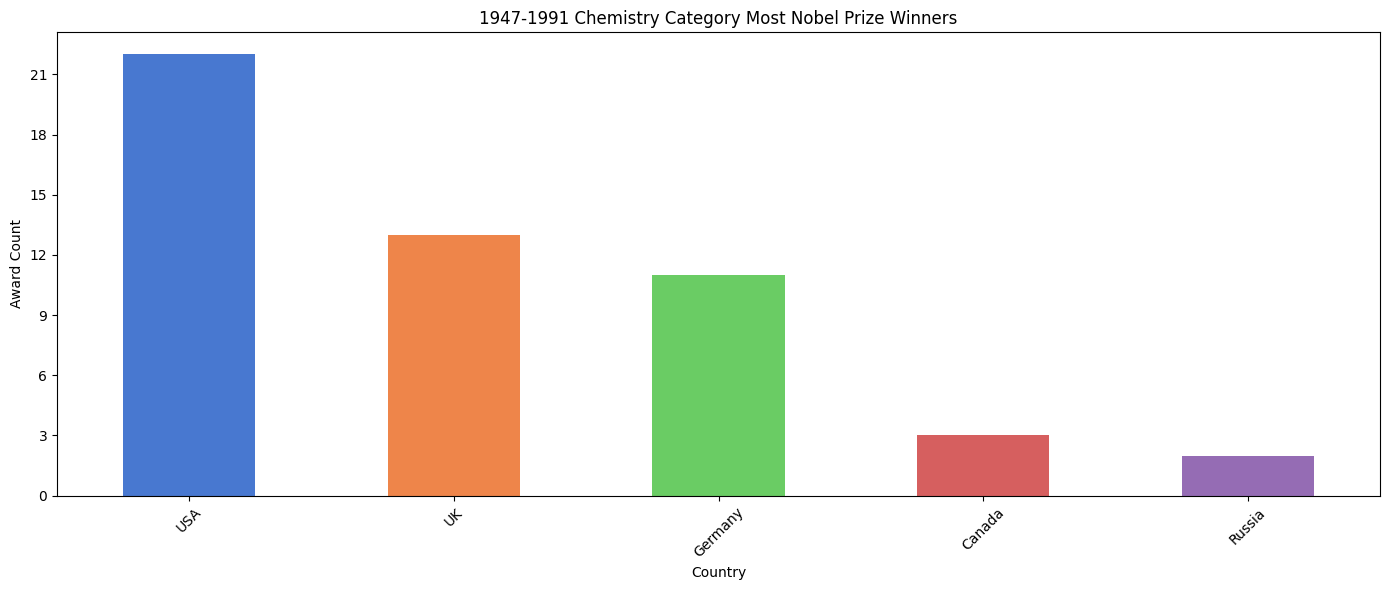

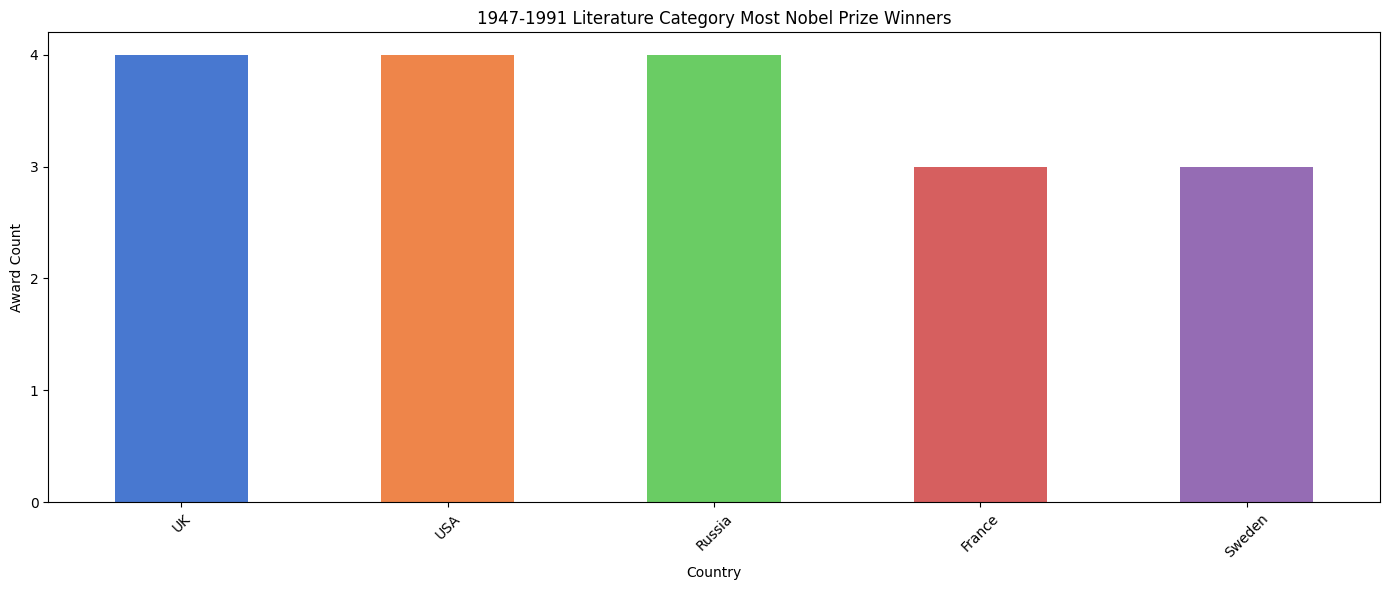

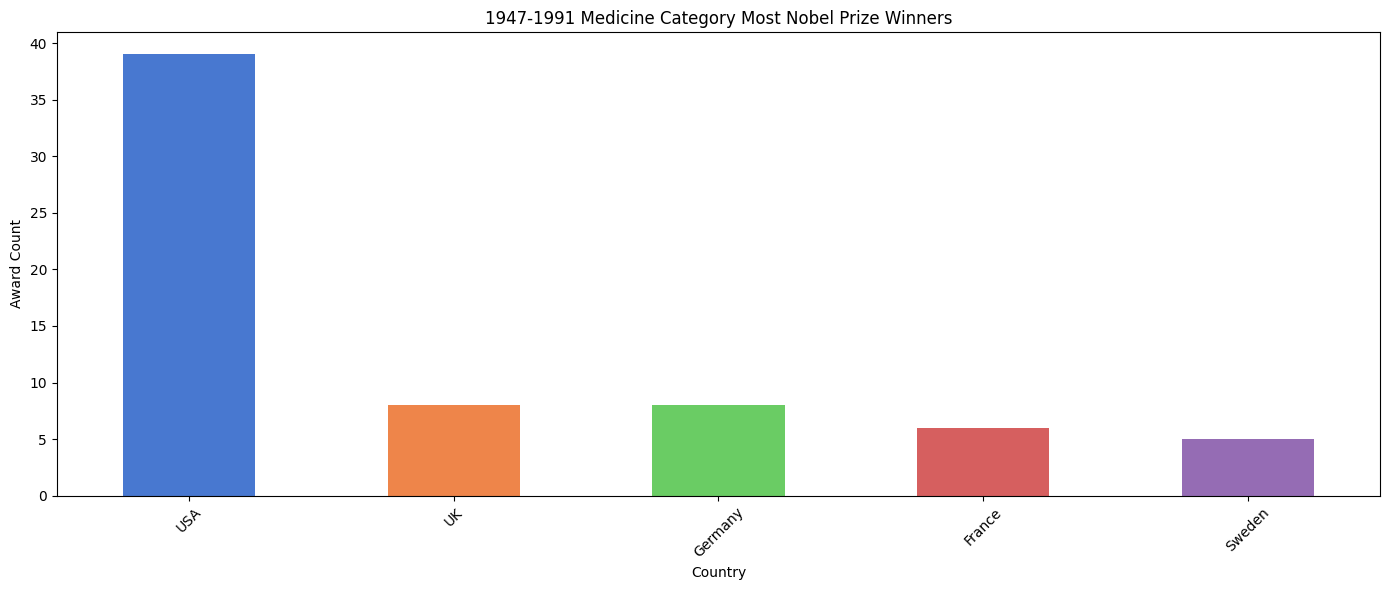

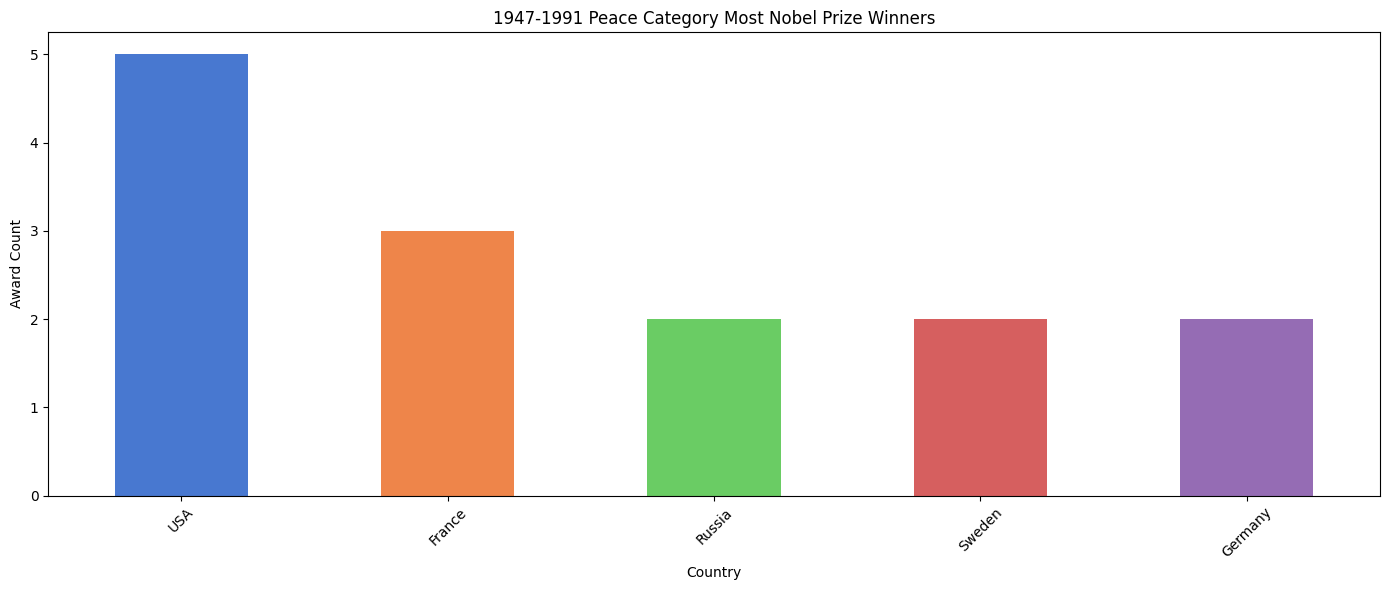

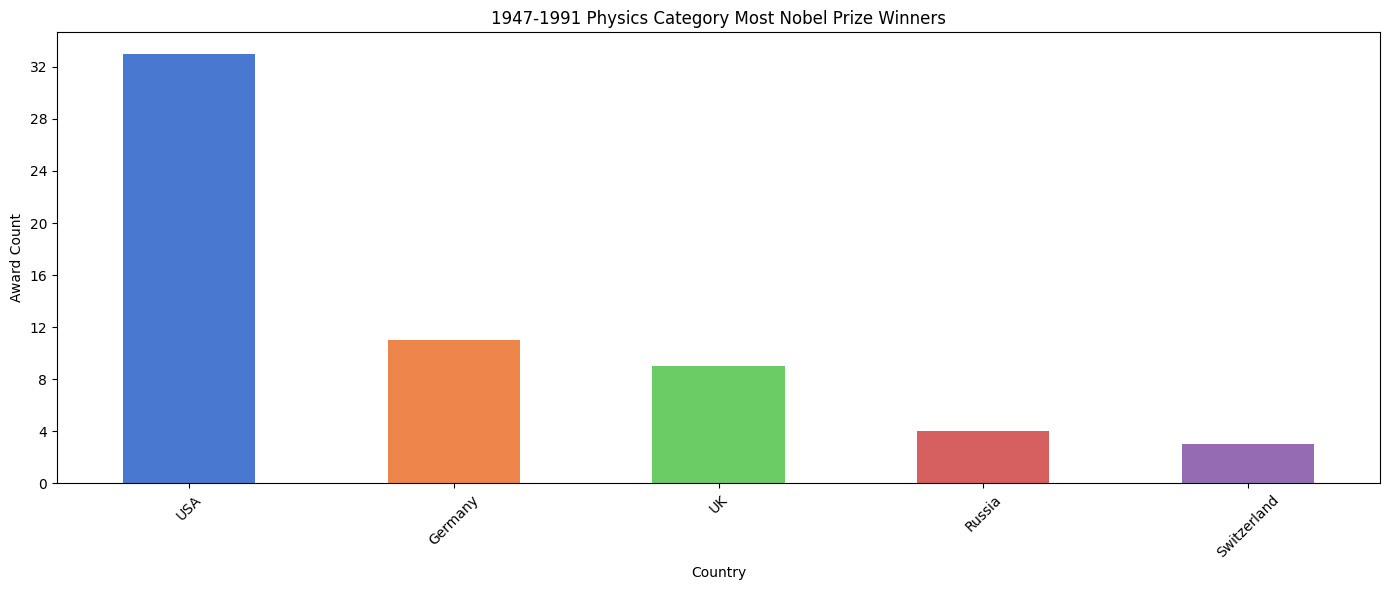

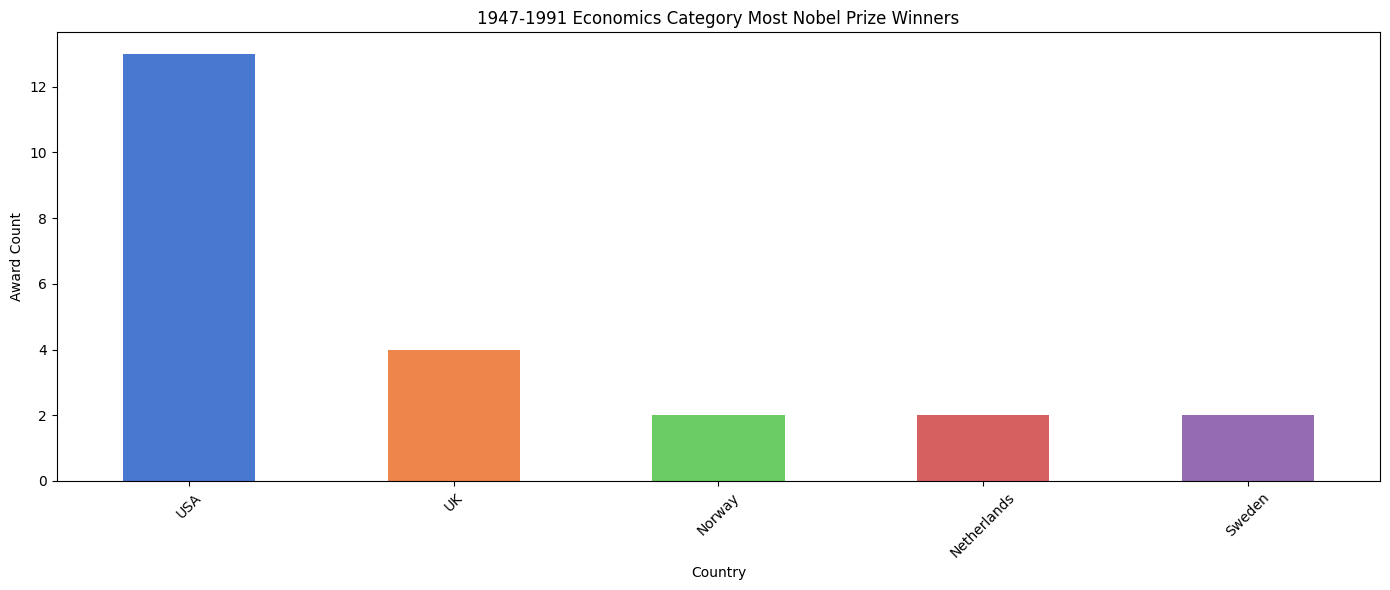

In [35]:
# Let's create separate charts by category
categories = df_range["Category"].unique()

# Renk paletini oluşturalım
country_palette = sns.color_palette("muted", 5)

# Let's create the color palette
categories = df_range["Category"].unique()

for category in categories:
    # Let's find the countries that have won the most prizes for each year and their numbers.
    most_awarded_countries = df_range[df_range["Category"] == category]["Winner_Country"].value_counts().nlargest(5)
    plt.figure(figsize=(14, 6))
    ax = most_awarded_countries.plot(kind="bar", color=country_palette)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title(f"1947-1991 {category} Category Most Nobel Prize Winners")
    plt.xlabel("Country")
    plt.ylabel("Award Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Question 8
### Visualize the countries and ages of people after 2000 in the categories of Chemistry, Literature, Peace, Physics and Medicine. (Separate visualizations are required for each category)


In [36]:
df_2000 = df[df['year'].between(2000, 2016)]
df_2000 = df_2000[~(df['category'] == 'Economics')]

In [37]:
df_2000 = df_2000[['year', 'category','birth_country','birth_date',"laureate_type"]]
df_2000['age'] = (df_2000['year'] - df_2000['birth_date'].dt.year)
df_2000 = df_2000.reset_index(drop=True)

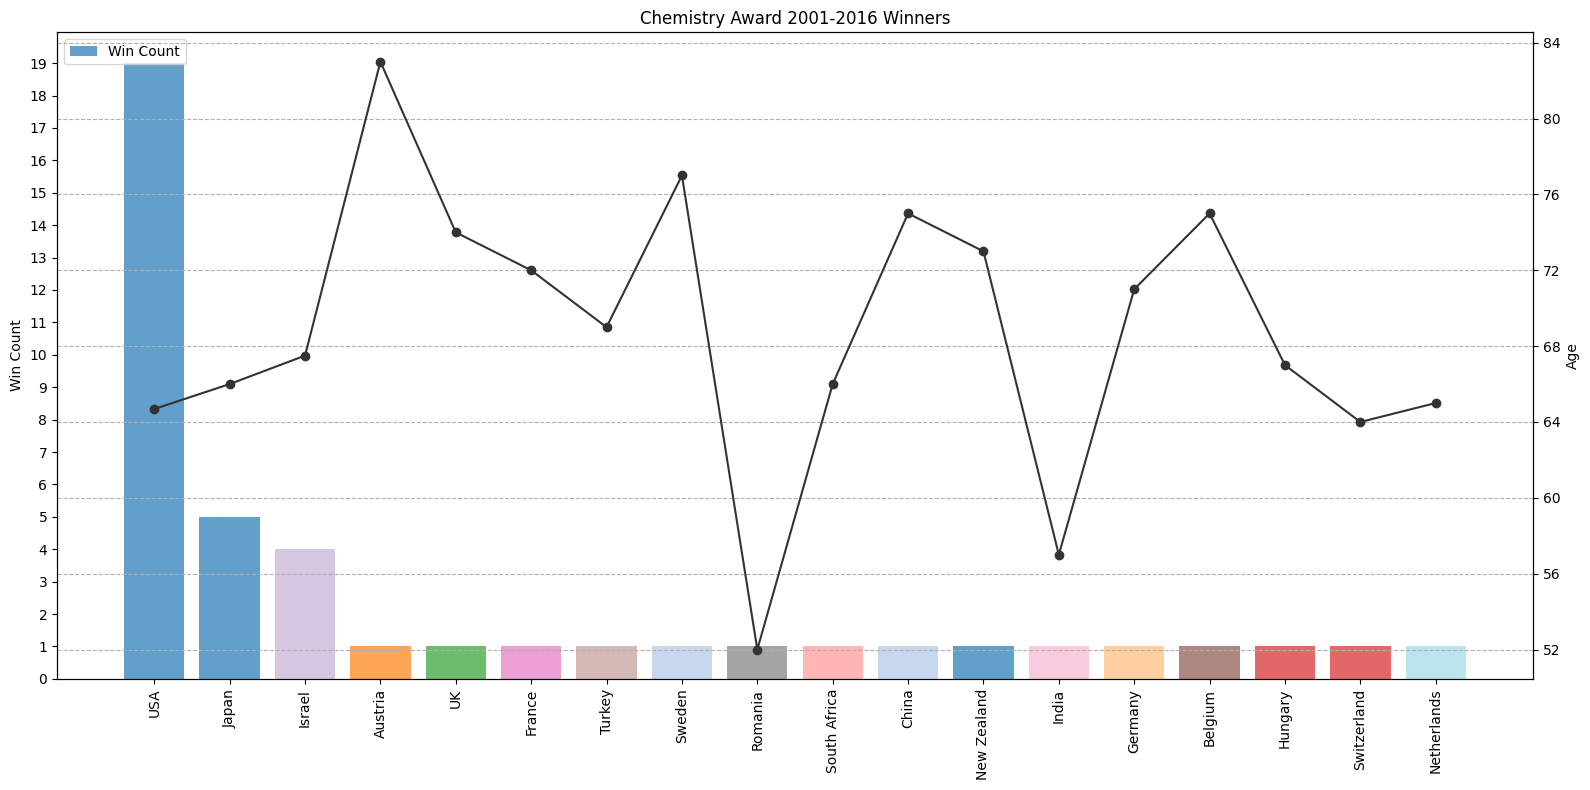

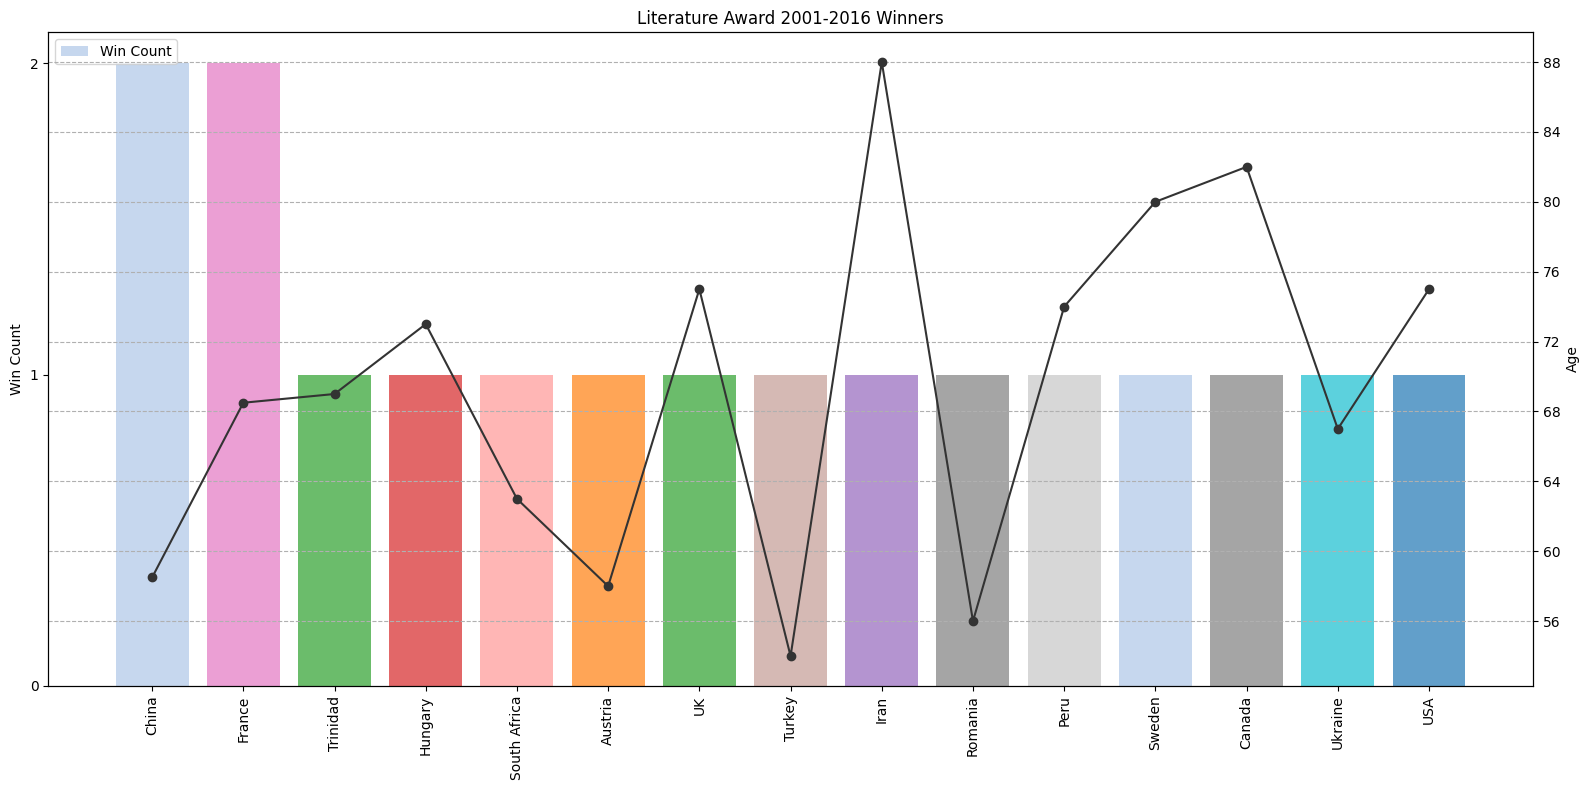

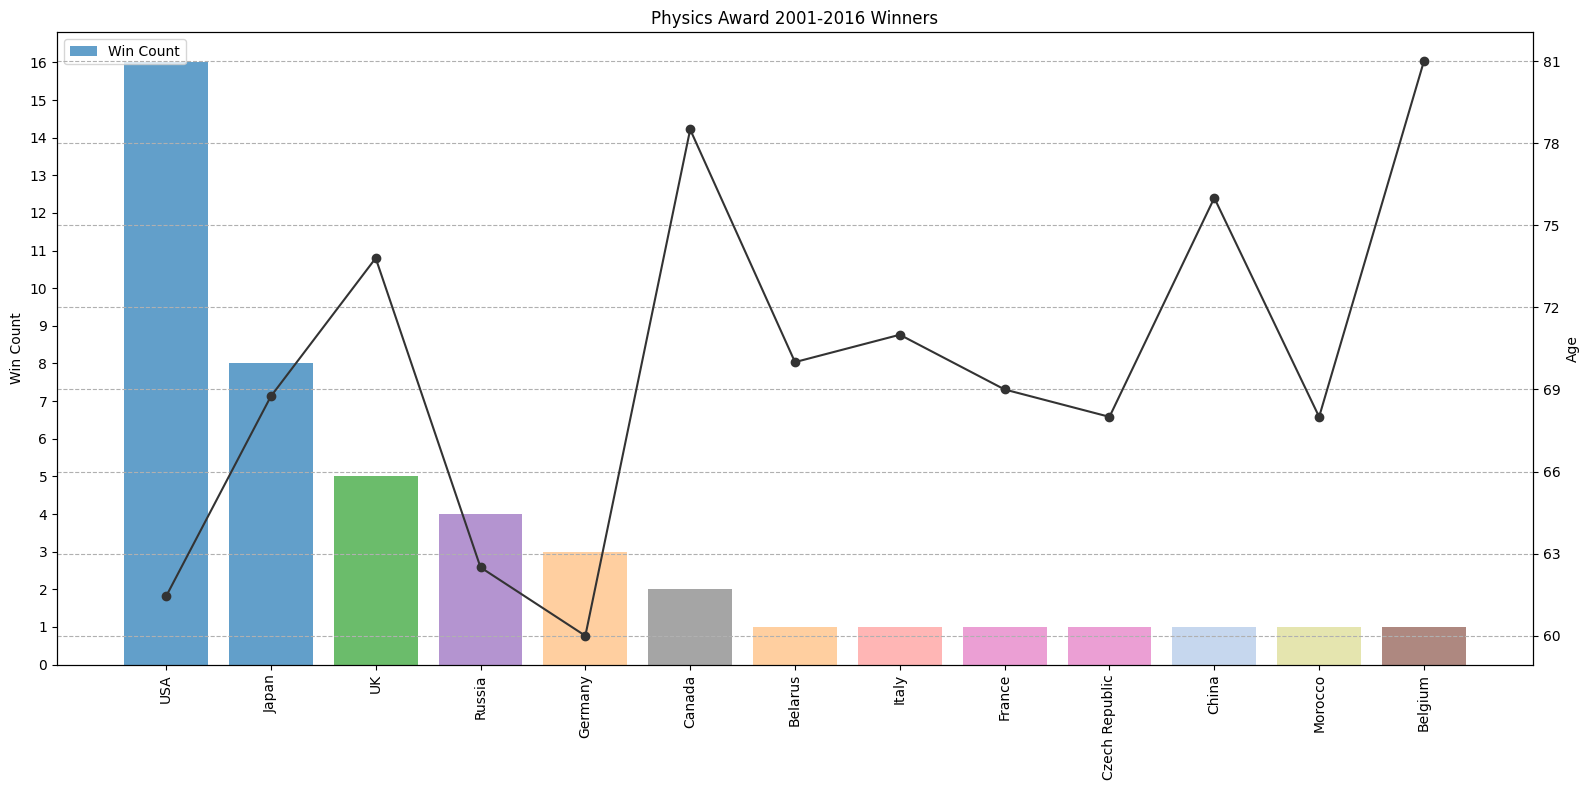

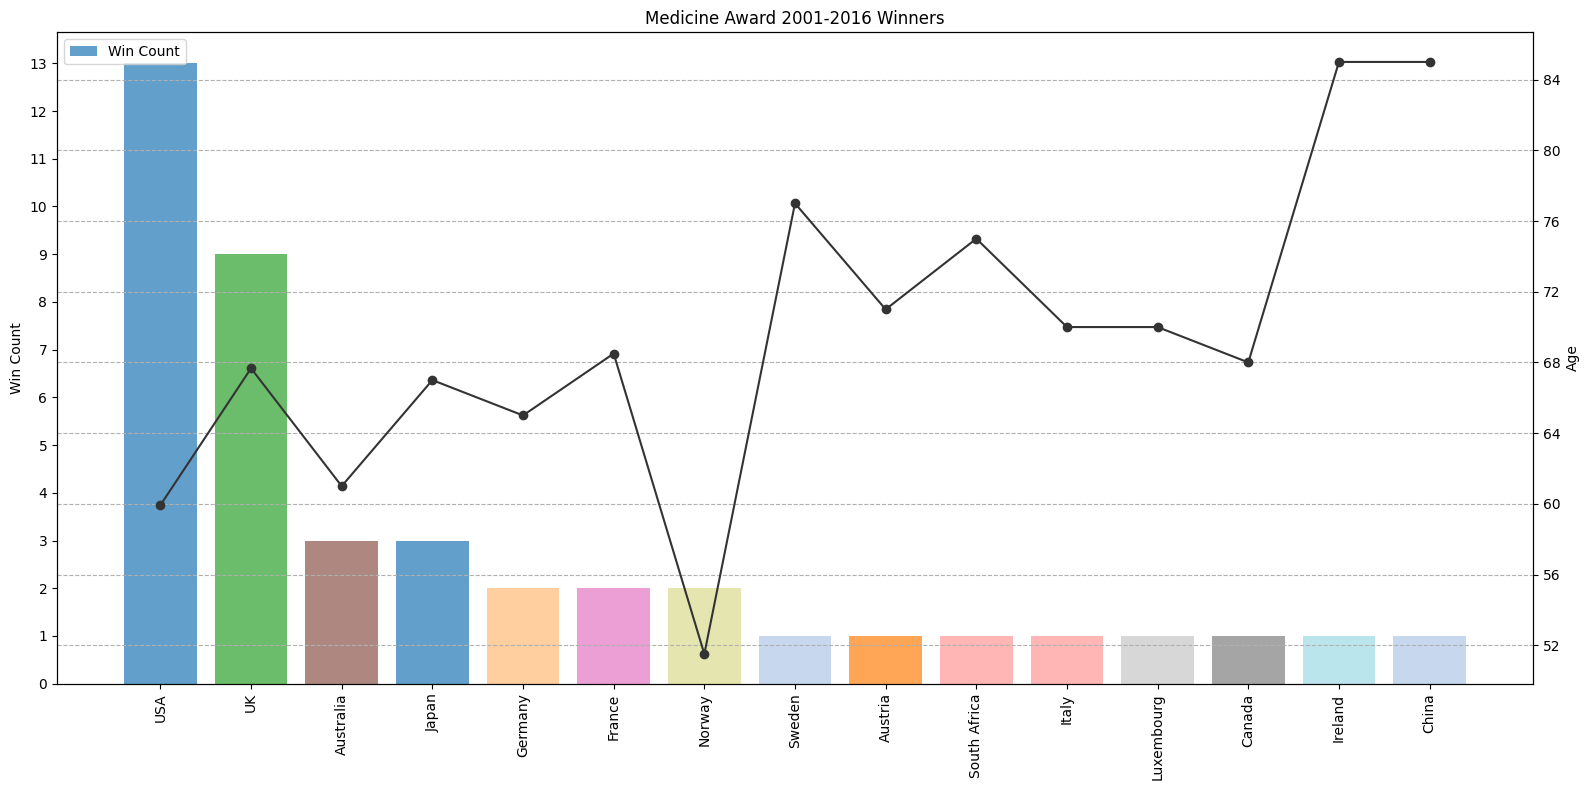

In [38]:
categories = ["Chemistry", "Literature","Physics", "Medicine"]

# Create different colors for countries
country_color_map = {}
unique_countries = df_2000["birth_country"].unique()
color_palette = plt.cm.tab20(np.linspace(0, 1, len(unique_countries)))
for i, country in enumerate(unique_countries):
    country_color_map[country] = color_palette[i]

for category in categories:
    category_winners = df_2000[df_2000["category"] == category]
    # Let's calculate the number of wins for each country
    country_counts = category_winners["birth_country"].value_counts()
    # Let's calculate the average age of each country
    country_mean_ages = category_winners.groupby("birth_country")["age"].mean()

    # Let's visualize.
    plt.figure(figsize=(16, 8))
    
    # Winning numbers bar chart
    countries = country_counts.index
    count_values = country_counts.values
    country_colors = [country_color_map[country] for country in countries]
    plt.bar(np.arange(len(countries)), count_values, color=country_colors, alpha=0.7, label='Win Count')
    
    plt.ylabel("Win Count") # Label for Win Count on the left y-axis
    plt.yticks(np.arange(0, max(count_values) + 1, 1))  # Integers on the Y axis
    plt.xticks(np.arange(len(countries)), countries, rotation=90)
    plt.legend(loc='upper left')
    
    # Yaş ortalamaları çizgi grafiği
    ax2 = plt.gca().twinx()  # İkinci bir y eksenini ekleyin
    mean_ages = country_mean_ages.reindex(countries, fill_value=0) 
    ax2.plot(np.arange(len(countries)), mean_ages, color='#333333', linestyle='-', marker='o', label='Mean Age')
    
    ax2.set_ylabel("Age") # Label for Mean Age on the right y-axis
    ax2.yaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Integers on the Y axis
    
    plt.title(f"{category} Award 2001-2016 Winners")
    plt.xlabel("Country")
    
    # Adding Grid
    plt.grid(True,linestyle="--",)
    
    plt.tight_layout()

    plt.show()

### Since awards in the Peace Category can be received in two different ways: individual and organization, we will give a separate review to this category.

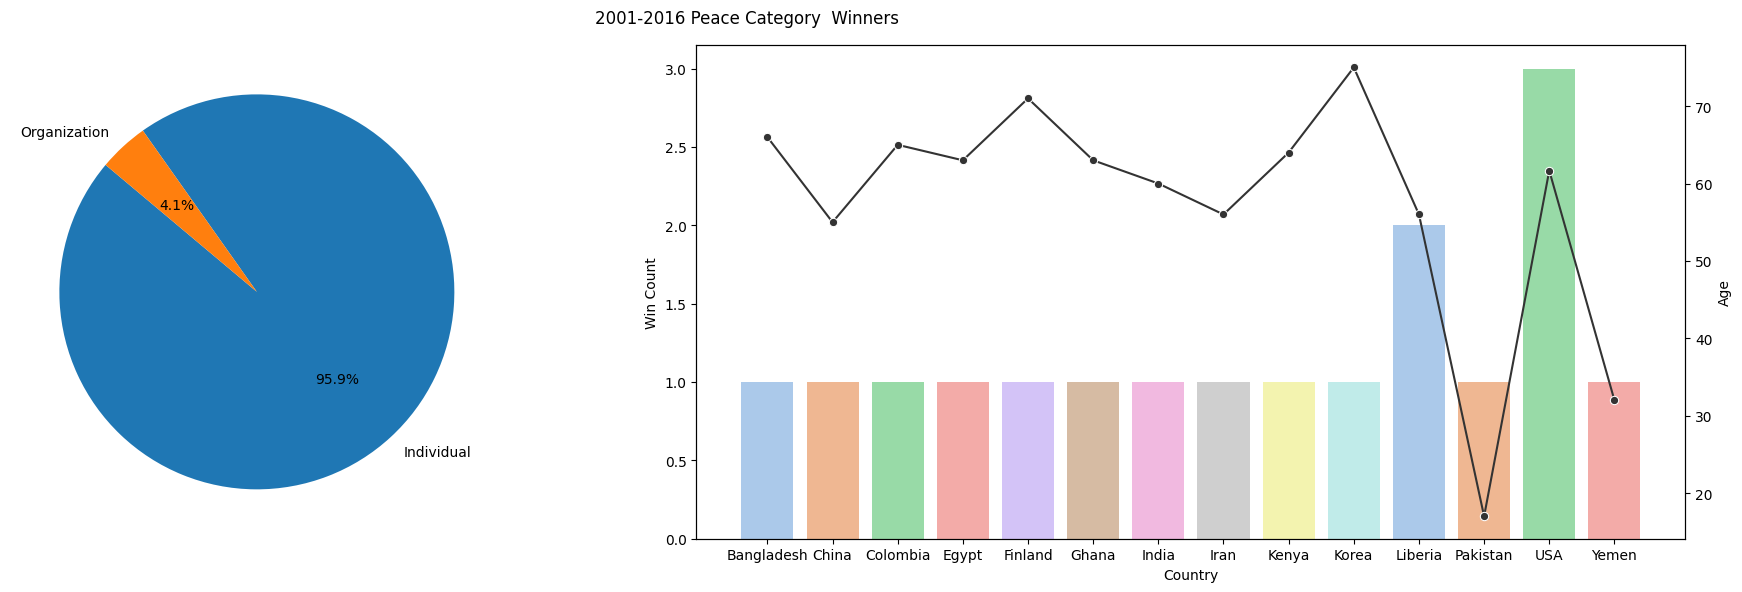

In [39]:
df_peace = df_2000[df_2000['category'] == 'Peace']
# Let's create a new DataFrame with the number of winners and their average age, grouped by the 'laureate_type' column.
grouped_df = df_peace.groupby('birth_country').agg({'age': 'mean', 'laureate_type': 'count'}).reset_index()
grouped_df.columns = ['birth_country', 'average_age', 'win_count']

# Let's create a subplot since more than one graphic will be next to each other.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Pie chart 
winners_count = df_2000['laureate_type'].value_counts()
ax1.pie(winners_count, labels=winners_count.index, autopct='%1.1f%%', startangle=140)

# Bar graph 
sns.barplot(x='birth_country', y='win_count', data=grouped_df, palette='pastel', ax=ax2)
ax2.set_ylabel('Win Count')
ax2.set_xlabel('Country')

# Let's add the average ages as a line plot on the second y-axis (right y-axis)
ax2_twin = ax2.twinx()
sns.lineplot(x='birth_country', y='average_age', data=grouped_df, color='#333333', marker='o', ax=ax2_twin)
ax2_twin.set_ylabel('Age')

plt.suptitle('2001-2016 Peace Category  Winners', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()